# Recolección de los Datos.
<div align="center">
    <img src="https://github.com/eotorresmolina/analytics_python/blob/main/images/Pipeline1.png?raw=true"
         width="1000" align="middle">  
</div>

In [2]:
import os
import platform

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

import keras
from keras.models import Sequential
from keras.utils import to_categorical

from glob import glob
import gdown

### **Whats-Burning dataset:**

El dataset "whats-burning" pesa alrededor de 500Mbytes y contiene 3801 imágenes a color, por un lado imágenes de incendios y/o fuego y por otro lado imágenes donde no hay fuego o simplemente humo. Cada imagen, al ser de color, cada pixel posee 3 canales de profundidad (R, G, B).

Dataset extraído de la página de "Kaggle: Your Machine Learning and Data Science Community"

<a href="https://www.kaggle.com/escofresco/whats-burning"><h4>Dataset source</h4></a>

In [3]:
# Descargar el dataset.
# Aprovechamos la librería gdown para descargar archivos automáticamente desde Google Drive.
# Hacemos uso de la librería os para tener control de la ruta de descarga.
dataset_name = "whats_burning_dataset"

if os.access(dataset_name, os.F_OK) is False:  # Si no se puede acceder al archivo (dataset)
    if os.access(dataset_name + '.zip', os.F_OK) is False: 
        url = "https://drive.google.com/uc?id=1y6SSwmQOGPVn5b7fNjnKIhxOTpajMSmh&export=download"
        output = dataset_name + '.zip'
        gdown.download(url, output, quiet=False)
    
    !unzip -q whats_burning_dataset.zip
    
else:
    print('El dataset ya se encuentra descargado.')

Downloading...
From: https://drive.google.com/uc?id=1y6SSwmQOGPVn5b7fNjnKIhxOTpajMSmh&export=download
To: /content/whats_burning_dataset.zip
521MB [00:05, 102MB/s]


In [4]:
# Visualizamos los directorios o carpetas usando la librería "os".
dataset = "./burning" # Nombre de la carpeta general.
dataset_folder = os.listdir(dataset)
dataset_folder

['train', 'test']

In [5]:
# Visualizar el contenido de las carpetas.
train_dir = os.path.join(dataset, 'train')
test_dir= os.path.join(dataset, 'test')
#print(train_dir + '     ' + test_dir)

files = os.listdir(train_dir) # Obtengo las salidas.
print('\n', files)
print('\nEl número de Salidas que voy a tener es:', len(files))


 ['not_fire', 'fire']

El número de Salidas que voy a tener es: 2


In [6]:
# Creo el path de la carpeta de "validation"
validation_dir = os.path.join(dataset, 'validation')

# Creo el directorio de "validation" y sus respectivas carpetas.
try:
  os.mkdir(validation_dir)
  os.mkdir(os.path.join(validation_dir, 'not_fire'))
  os.mkdir(os.path.join(validation_dir, 'fire'))
  
  print("Create the directory {}".format(validation_dir))
  print("Create the directory {}".format(os.path.join(validation_dir, 'not_fire')))
  print("Create the directory {}".format(os.path.join(validation_dir, 'not_fire')))

except OSError as error:
  print(error)

Create the directory ./burning/validation
Create the directory ./burning/validation/not_fire
Create the directory ./burning/validation/not_fire


In [7]:
# Compruebo nuevamente las carpetas del dataset
dataset = "./burning" # Nombre de la carpeta general.
dataset_folder = os.listdir(dataset)
print('Contenido del directorio {} es:\n\n{}'.format(dataset, dataset_folder))

Contenido del directorio ./burning es:

['validation', 'train', 'test']


In [8]:
# Visualizo ahora que la carpeta de "validation" tenga las 
# subcarpetas correspondientes
os.listdir(validation_dir)

['not_fire', 'fire']

#### **Conclusiones**
Ahora tenemos creada la carpeta de "validation" y a su vez la misma está dividida en las categorías correspondientes.

A continuación vamos a exportar algunas imágenes de "train" y "validation" por cada categoría.

In [10]:
# Obtenemos las imágenes de cada categoría de la carpeta "train" usando 
# biblioteca glob.
formats = ['/**.jpg', '/**.JPG', '/**.png', '/**.PNG', '/**.jpeg', '/**.JPEG']
train_notfire_img = []
train_fire_img = []

for format in formats:
  train_notfire_img += glob(train_dir + "/" + 'not_fire' + format)
  train_fire_img += glob(train_dir + "/" + 'fire' + format)


In [11]:
# Obtengo la cantidad de imágenes de cada categoría:
len(train_notfire_img), len(train_fire_img)

(2113, 928)

In [12]:
# Realizamos lo mismo con la carpeta de "test".
formats = ['/**.jpg', '/**.JPG', '/**.png', '/**.PNG', '/**.jpeg', '/**.JPEG']
test_notfire_imgs = []
test_fire_imgs = []

for format in formats:
  test_notfire_imgs += glob(test_dir + "/" + 'not_fire' + format)
  test_fire_imgs += glob(test_dir + "/" + 'fire' + format)

In [13]:
# Obtengo la cantidad de imágenes de cada categoría:
len(test_notfire_imgs), len(test_fire_imgs)

(528, 232)

#### **Importante**: Como tengo pocos datos de "train", voy a dejar aprox. 20 imágenes de cada categoría en la carpeta de "test", las demás serán movidas a "train".

In [15]:
import random
from shutil import move

# Función que mueve una cantidad de imágenes a
# una dirección destino, se debe pasar como 1er
# parámetro un contenedor (lista/tupla) con las imágenes,
# el destino y el porcentaje de las imágenes.

def move_imgs (src_imgs, dst_path, percent_imgs):
  # Obtengo la cantidad de imágenes de forma random.
  cant_imgs = int(np.ceil((len(src_imgs) * percent_imgs) / 100 ))
  imgs = random.sample(src_imgs, cant_imgs)
  
  for img in imgs:
    move(src=img, dst=dst_path)

  print('{} images trasferred to: "{}"'.format(cant_imgs, dst_path))

In [16]:
# Muevo las imágenes de "test" a "train"
move_imgs(src_imgs=test_notfire_imgs, dst_path=os.path.join(train_dir, 'not_fire'), percent_imgs=96.2)
move_imgs(src_imgs=test_fire_imgs, dst_path=os.path.join(train_dir, 'fire'), percent_imgs=91.3)

508 images trasferred to: "./burning/train/not_fire"
212 images trasferred to: "./burning/train/fire"


In [17]:
# Muevo las imágenes a la carpeta de "validation" - "not_fire"

dst=os.path.join(validation_dir, "not_fire")
percentage = 20

move_imgs (src_imgs=train_notfire_img, dst_path=dst, percent_imgs= percentage)

423 images trasferred to: "./burning/validation/not_fire"


In [18]:
# Muevo las imágenes a la carpeta de "validation" - "fire"

dst=os.path.join(validation_dir, "fire")
percentage = 20

move_imgs (src_imgs=train_fire_img, dst_path=dst, percent_imgs= percentage)

186 images trasferred to: "./burning/validation/fire"


In [19]:
# Se vuelve a ver la cant. de imágenes de cada categoría del
# directorio "train".
formats = ['/**.jpg', '/**.JPG', '/**.png', '/**.PNG', '/**.jpeg', '/**.JPEG']
train_notfire_img = []
train_fire_img = []

for format in formats:
  train_notfire_img += glob(train_dir + "/" + 'not_fire' + format)
  train_fire_img += glob(train_dir + "/" + 'fire' + format)

len(train_notfire_img), len(train_fire_img)

(2198, 954)

In [20]:
# Visulizamos la cant. de imágenes de cada categoría del
# directorio "test".
formats = ['/**.jpg', '/**.JPG', '/**.png', '/**.PNG', '/**.jpeg', '/**.JPEG']
test_notfire_imgs = []
test_fire_imgs = []

for format in formats:
  test_notfire_imgs += glob(test_dir + "/" + 'not_fire' + format)
  test_fire_imgs += glob(test_dir + "/" + 'fire' + format)

len(test_notfire_imgs), len(test_fire_imgs)

(20, 20)

In [21]:
# Visulizamos la cant. de imágenes de cada categoría del
# directorio "validation".
validation_notfire_img = glob(validation_dir + "/" + 'fire' + "/**.jpg")
validation_fire_img = glob(validation_dir + "/" + 'not_fire' + "/**.jpg")
len(validation_notfire_img), len(validation_fire_img)

(185, 420)

#### **Conclusiones**
Ya hemos tomado y separado algunos de los datos/imágenes de "train" y los hemos agregado en "validation", lo que significa que tenemos datos para validar.

Ahora se procede a visualizar alguna de las imágenes y se procede a ver las características de cada imagen.

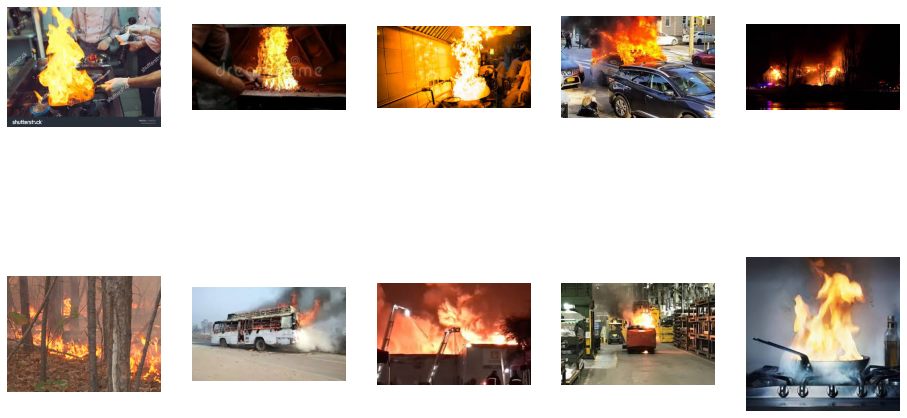

In [22]:
# Visualizar las primeras 10 imágenes de la categoría "fire" de la
# carpeta de "train".
fig1 = plt.figure(figsize=(16, 9))

for i in range(10):
  ax =fig1.add_subplot(2, 5, i+1)
  ax.axis('off')
  img = mpimg.imread(train_fire_img[i])
  plt.imshow(img)

plt.show()

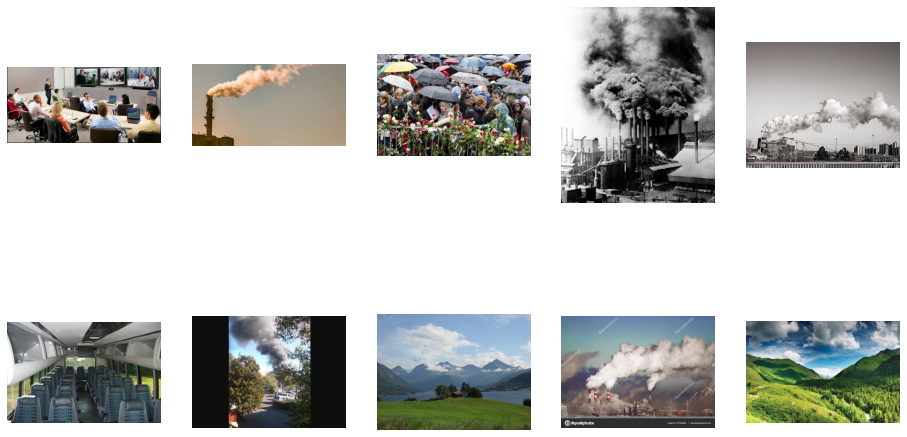

In [23]:
# Visualizar las primeras 10 imágenes de la categoría "not_fire" de la
# carpeta de "train".
fig2 = plt.figure(figsize=(16, 9))

for i in range(10):
  ax =fig2.add_subplot(2, 5, i+1)
  ax.axis('off')
  img = mpimg.imread(train_notfire_img[i])
  plt.imshow(img)

plt.show()

In [24]:
# Visualizamos la dimensión de las 10 primeras imágenes de "fire".
print('Shape:\n')
for i in range(10):
  img = mpimg.imread(train_fire_img[i])
  print(img.shape)

Shape:

(198, 254, 3)
(168, 300, 3)
(163, 309, 3)
(183, 276, 3)
(168, 300, 3)
(401, 534, 3)
(175, 287, 3)
(183, 275, 3)
(183, 275, 3)
(225, 225, 3)


In [25]:
# Visualizamos como están representados los píxeles de
# la 1er imagen de la categoría "fire"
img = mpimg.imread(train_fire_img[0])
print(img[101, 114:122, :])

[[101  49   0]
 [ 90  49  29]
 [ 92  58  59]
 [ 72  39  48]
 [ 82  45  53]
 [ 88  46  48]
 [ 79  35  34]
 [106  66  66]]


#### **Conclusiones**
* Las imágenes tienen distinta resolución(tamaño), por  lo tanto hay que utilizar un tamaño único para que todas las imágenes sean iguales (se elije una resolución de 150x150).
* En las imágenes, cada píxel, como se puede observar, están representados de 0 a 255, por lo hay que normalizar los mismos.

In [26]:
# Obtenemos las categorías:
categorias = os.listdir(train_dir)
categorias

['not_fire', 'fire']

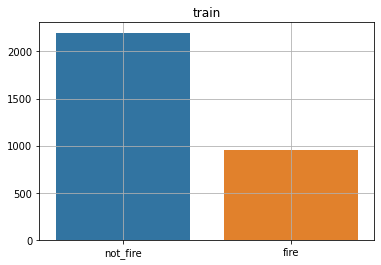

In [27]:
# Realizamos un gráfico de barra para visualizar
# que tan balanceado o desbalanceados están
# las categorías "fire" y "not_fire" de los
# datos de "train".
fig = plt.figure()
ax = fig.add_subplot()
ax.set_title('train')
sns.barplot(x=categorias, y=[len(train_notfire_img), len(train_fire_img)], ax=ax)
ax.grid()
plt.show()

#### **Conclusiones**
Observamos que el dataset de "train" está bastante desbalanceado. Hay más imágenes de "not_fire" que de "fire".

Nuestra salida (target) es multicategórica ("not_fire", "fire")

# Procesamiento de los Datos.
<div align="center">
    <img src="https://github.com/eotorresmolina/analytics_python/blob/main/images/Pipeline2.png?raw=true"
         width=1000 aling="middle">
</div>

In [28]:
# Creamos un generador, donde indicamos si deseamos realizar un escalado
# y/o normalización de las imágenes.
from keras.preprocessing.image import ImageDataGenerator

norma = 255   # Definimos la norma.
standard_resolution = (150, 150)

train_datagen = ImageDataGenerator(rescale=1./norma)
validation_datagen = ImageDataGenerator(rescale=1./norma)

train_generator = train_datagen.flow_from_directory(
    directory = train_dir,
    target_size = standard_resolution,
    batch_size = 20,
    class_mode = 'categorical')

validation_generator = validation_datagen.flow_from_directory(
    directory = validation_dir,
    target_size = standard_resolution,
    batch_size = 20,
    class_mode = 'categorical')

Found 3152 images belonging to 2 classes.
Found 609 images belonging to 2 classes.


In [29]:
# Obtengo un diccionario con la cant de clases
train_generator.class_indices

{'fire': 0, 'not_fire': 1}

In [30]:
# Ahora realizamos este paso para obtener los
# índices de las etiquetas y la visualizamos
# como un diccionario.
index_to_classes = dict(zip(train_generator.class_indices.values(), train_generator.class_indices.keys()))
index_to_classes

{0: 'fire', 1: 'not_fire'}

#### **Conclusiones**
Hemos creados los generadores, realizamos una normalización de los canales de cada píxel de las imágenes y finalmente modificamos el tamaño de las mismas eligiendo una resolución estándar. Todo esto usando el DataImageGenerator proporcionado por Keras.

# Exploración de los Datos.
<div align="center">
    <img src="https://github.com/eotorresmolina/analytics_python/blob/main/images/Pipeline3.png?raw=true"
         width=1000 aling="middle">
</div>

In [31]:
# El generador "train_generator" se lo puede utilizar para acceder a los datos
# de a cantidad batch de imágenes. En este caso el generador me retornará
# la primera vez las primeras 20 imágenes.
# El generador va a devolver por un lado las 20 1ras imágenes y por otro lado
# la clase a la que pertenece cada una a través del método "next".
batch_imgs, batch_classes = train_generator.next()

In [32]:
# Efectivamente visualizamos que el generador entregó 20 imágenes 
# de 150x150 a color (3 canales).
batch_imgs.shape

(20, 150, 150, 3)

In [33]:
# Visualizamos la clase a la que pertenece cada una de las
# 20 imágenes devueltas por el generador.
batch_classes.shape

(20, 2)

In [34]:
print("Cantidad de imágenes en el batch:", batch_imgs.shape[0])
print("Dimensión de la imagen:", batch_imgs.shape[1:])

Cantidad de imágenes en el batch: 20
Dimensión de la imagen: (150, 150, 3)


In [35]:
print('Categorías:', categorias)
print("Cantidad de clases/categorías:", batch_classes.shape[1])

Categorías: ['not_fire', 'fire']
Cantidad de clases/categorías: 2


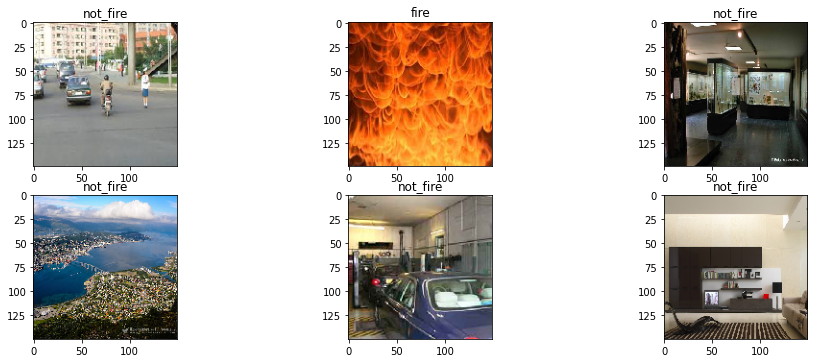

In [36]:
# Visualizamos las primeras 6 imágenes del batch devuelto por el generador.
fig = plt.figure(figsize=(16, 9))
for i in range(6):
  ax = fig.add_subplot(3, 3, i+1)
  ax.axis('on')
  classes_name = batch_classes[i].argmax()  # Obtengo el índice de las etiquetas.
  ax.set_title(index_to_classes.get(classes_name)) # Obtengo las etiquetas.
  ax.imshow((batch_imgs[i]))

plt.show()

#### **Conclusiones**
* Observamos que ahora las imágenes efectivamente son de 150x150.
* El generador ya que encarga de transformar la salida (target), de labels a oneHotEncoding.

#### **Importante**
Una vez que es consumido el generador, los datos (imágenes) desaparecen de memoria, por lo que hay que volver a crear el generador.

In [37]:
# Volvemos a crear el generador de "train"
train_generator = train_datagen.flow_from_directory(
    directory = train_dir,
    target_size = standard_resolution,
    batch_size = 20,
    class_mode = 'categorical')

index_to_classes = dict(zip(train_generator.class_indices.values(), train_generator.class_indices.keys()))


Found 3152 images belonging to 2 classes.


# Entrenamiento del Modelo.
<div align="center">
    <img src="https://github.com/eotorresmolina/analytics_python/blob/main/images/Pipeline4.png?raw=true"
         width=1000 aling="middle">
</div>

In [38]:
# input shape (observado del análisis de datos)
in_shape = batch_imgs.shape[1:]
in_shape

(150, 150, 3)

In [40]:
# output shape (observado del análisis de datos)
out_shape = batch_classes.shape[1]
out_shape

2

#### **Importante**
Cuando nosotros usamos ImageDataGenerator el sistema no sabe de antemano el tamaño del batch, es decir, no sabe cuantas imágenes va a leer por épocas (por ciclos de entrenamiento), por lo tanto se lo tenemos que decir.

In [41]:
# Debemos definir cuántas imágenes se consumirán por
# época (step_per_epoch) ya que estando el generador
# en el medio Keras no puede saberlo por su cuenta.

# El resultado equivale a dividir la cant. total de 
# imágenes que hay en el directorio de "train" dividido
# el tamaño del batch. (en este caso: 2436 / 20)

step_per_epoch_train = len(train_generator)
step_per_epoch_train

158

In [42]:
# Realizamos un 1er modelo con una 1 pareja de CONV+POOL
# y una Sola capa oculta.
from keras.layers import Dense, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.optimizers import Adam

model1 = Sequential()

model1.add(Conv2D(filters=8, kernel_size=(5,5), strides=1,
                  padding='same', activation='relu',
                  input_shape=in_shape))
model1.add(MaxPooling2D(pool_size=2, strides=2, padding='valid'))
model1.add(Flatten())
model1.add(Dense(units=64, activation='relu'))
model1.add(Dense(units=out_shape, activation='softmax'))

model1.compile(optimizer='Adam', loss='categorical_crossentropy',
               metrics=['accuracy'])

model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 8)       608       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 8)         0         
_________________________________________________________________
flatten (Flatten)            (None, 45000)             0         
_________________________________________________________________
dense (Dense)                (None, 64)                2880064   
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 130       
Total params: 2,880,802
Trainable params: 2,880,802
Non-trainable params: 0
_________________________________________________________________


In [144]:
# Entrenamos el modelo 1: 
history1= model1.fit(train_generator, validation_data=validation_generator,
                      steps_per_epoch=step_per_epoch_train, epochs=10)

Epoch 1/10
158/158 [==============================] - 29s 185ms/step - loss: 0.4924 - accuracy: 0.7865 - val_loss: 0.4984 - val_accuracy: 0.8259
Epoch 2/10
158/158 [==============================] - 29s 183ms/step - loss: 0.3958 - accuracy: 0.8385 - val_loss: 0.3215 - val_accuracy: 0.8834
Epoch 3/10
158/158 [==============================] - 29s 182ms/step - loss: 0.3479 - accuracy: 0.8617 - val_loss: 0.3092 - val_accuracy: 0.8818
Epoch 4/10
158/158 [==============================] - 29s 183ms/step - loss: 0.3231 - accuracy: 0.8680 - val_loss: 0.3172 - val_accuracy: 0.8949
Epoch 5/10
158/158 [==============================] - 29s 182ms/step - loss: 0.3058 - accuracy: 0.8747 - val_loss: 0.2792 - val_accuracy: 0.8949
Epoch 6/10
158/158 [==============================] - 29s 183ms/step - loss: 0.2999 - accuracy: 0.8798 - val_loss: 0.2647 - val_accuracy: 0.8982
Epoch 7/10
158/158 [==============================] - 29s 183ms/step - loss: 0.2883 - accuracy: 0.8874 - val_loss: 0.2535 - val_ac

In [44]:
# Ahora realizamos un 2do modelo usando "Regularización"
# con Dropout.
# Misma cantidad de capas de CONV+POOL y misma cantidad de
# neuronas en una única capa oculta.
from keras.layers import Dense, Flatten, Dropout
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.optimizers import Adam

model2 = Sequential()

model2.add(Conv2D(filters=8, kernel_size=(5,5), strides=1,
                  padding='same', activation='relu',
                  input_shape=in_shape))
model2.add(MaxPooling2D(pool_size=2, strides=2, padding='valid'))
model2.add(Flatten())
model2.add(Dense(units=64, activation='relu'))
model2.add(Dropout(rate=0.2))
model2.add(Dense(units=out_shape, activation='softmax'))

model2.compile(optimizer='Adam', loss='categorical_crossentropy',
               metrics=['accuracy'])

model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 150, 150, 8)       608       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 75, 75, 8)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 45000)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                2880064   
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 130       
Total params: 2,880,802
Trainable params: 2,880,802
Non-trainable params: 0
____________________________________________

In [45]:
# Entrenamos el modelo
history2= model2.fit(train_generator, validation_data=validation_generator,
                      steps_per_epoch=step_per_epoch_train, epochs=10)

Epoch 1/10
158/158 [==============================] - 17s 106ms/step - loss: 1.2113 - accuracy: 0.7451 - val_loss: 0.3407 - val_accuracy: 0.8604
Epoch 2/10
158/158 [==============================] - 17s 105ms/step - loss: 0.2846 - accuracy: 0.8737 - val_loss: 0.3643 - val_accuracy: 0.8686
Epoch 3/10
158/158 [==============================] - 16s 104ms/step - loss: 0.2258 - accuracy: 0.9101 - val_loss: 0.2908 - val_accuracy: 0.8851
Epoch 4/10
158/158 [==============================] - 16s 104ms/step - loss: 0.1601 - accuracy: 0.9355 - val_loss: 0.3449 - val_accuracy: 0.8719
Epoch 5/10
158/158 [==============================] - 16s 103ms/step - loss: 0.1230 - accuracy: 0.9487 - val_loss: 0.3580 - val_accuracy: 0.8916
Epoch 6/10
158/158 [==============================] - 17s 105ms/step - loss: 0.0787 - accuracy: 0.9741 - val_loss: 0.4577 - val_accuracy: 0.8670
Epoch 7/10
158/158 [==============================] - 16s 103ms/step - loss: 0.1023 - accuracy: 0.9659 - val_loss: 0.3365 - val_ac

In [68]:
# Ahora agregaremos más pares de capas CONV + POOL a fin de reducir más la
# dimensión de la imagen antes de llegar a la capa flatten
# Otra estrategia es ir aumentando la cantidad de filtros a medida que crece
# la profundidad de la red.

model3 = Sequential()

# convolucional f=(3,3), # de filtros: 8, activación relu
# max pooling f=2, s=2
model3.add(Conv2D(filters = 8, kernel_size = (3, 3), strides=1, padding='same', activation='relu', input_shape=(150, 150, 3)))
model3.add(MaxPooling2D(pool_size=2, strides=2, padding='valid'))
# convolucional f=(3,3), # de filtros: 16, activación relu
# max pooling f=2, s=2
model3.add(Conv2D(filters = 16, kernel_size = (3, 3), strides=1, padding='same', activation='relu'))
model3.add(MaxPooling2D(pool_size=2, strides=2))
# convolucional f=(3,3), # de filtros: 32, activación relu
# max pooling f=2, s=2
model3.add(Conv2D(filters = 32, kernel_size = (3, 3), strides=1, padding='same', activation='relu'))
model3.add(MaxPooling2D(pool_size=2, strides=2))
# capa flatten
model3.add(Flatten())
# capa densa de 128 elementos activación relu
model3.add(Dense(units=128, activation='relu'))
model3.add(Dropout(rate=0.2))
# capa densa con un output de 10 elemento con activación softmax
model3.add(Dense(units=out_shape, activation='softmax'))

model3.compile(optimizer="Adam", loss='categorical_crossentropy',
              metrics=['accuracy'])

model3.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_30 (Conv2D)           (None, 150, 150, 8)       224       
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 75, 75, 8)         0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 75, 75, 16)        1168      
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 37, 37, 16)        0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 37, 37, 32)        4640      
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 18, 18, 32)        0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 10368)            

In [69]:
history3= model3.fit(train_generator, validation_data=validation_generator,
                      steps_per_epoch=step_per_epoch_train, epochs=10)

Epoch 1/10
158/158 [==============================] - 18s 112ms/step - loss: 0.4526 - accuracy: 0.7967 - val_loss: 0.2906 - val_accuracy: 0.8670
Epoch 2/10
158/158 [==============================] - 17s 108ms/step - loss: 0.2754 - accuracy: 0.8880 - val_loss: 0.2323 - val_accuracy: 0.9097
Epoch 3/10
158/158 [==============================] - 17s 106ms/step - loss: 0.2092 - accuracy: 0.9134 - val_loss: 0.1986 - val_accuracy: 0.9228
Epoch 4/10
158/158 [==============================] - 17s 105ms/step - loss: 0.1640 - accuracy: 0.9388 - val_loss: 0.1939 - val_accuracy: 0.9195
Epoch 5/10
158/158 [==============================] - 17s 105ms/step - loss: 0.1331 - accuracy: 0.9467 - val_loss: 0.1771 - val_accuracy: 0.9343
Epoch 6/10
158/158 [==============================] - 17s 105ms/step - loss: 0.0958 - accuracy: 0.9677 - val_loss: 0.1956 - val_accuracy: 0.9392
Epoch 7/10
158/158 [==============================] - 17s 105ms/step - loss: 0.0782 - accuracy: 0.9738 - val_loss: 0.2098 - val_ac

In [108]:
# Creo un 4to modelo utilizando esta vez "Data Aumentation".
train_datagen = ImageDataGenerator(
                    rescale=1./norma,
                    rotation_range=40,
                    width_shift_range=0.2,
                    height_shift_range=0.2,
                    shear_range=0.2,
                    zoom_range=0.2,
                    horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(
        directory=train_dir,
        target_size=standard_resolution,
        batch_size=20,
        class_mode="categorical")

index_to_classes = dict(zip(train_generator.class_indices.values(), train_generator.class_indices.keys()))

Found 3152 images belonging to 2 classes.


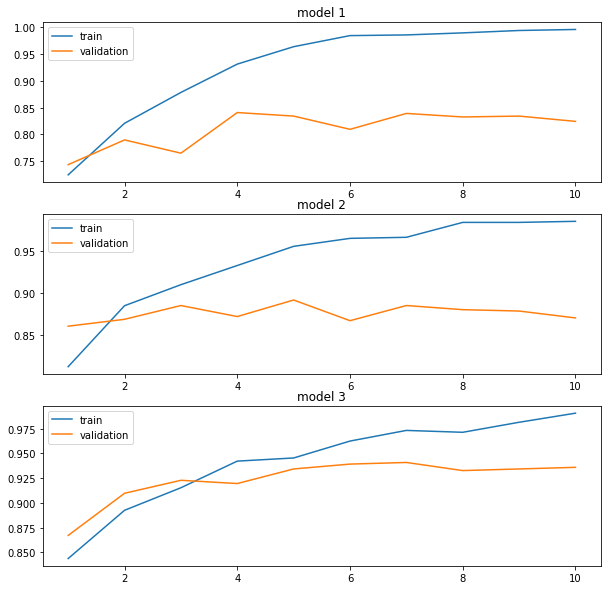

In [114]:
# Gráficamos el accuracy de train y de validation en
# función de las epocas
fig1 = plt.figure(figsize=(10, 10))

ax = fig1.add_subplot(3, 1, 1)
epoch_count = range(1, len(history1.history['accuracy']) + 1)
sns.lineplot(x=epoch_count,  y=history1.history['accuracy'], label='train')
sns.lineplot(x=epoch_count,  y=history1.history['val_accuracy'], label='validation')
plt.title('model 1')

ax = fig1.add_subplot(3, 1, 2)
epoch_count = range(1, len(history2.history['accuracy']) + 1)
sns.lineplot(x=epoch_count,  y=history2.history['accuracy'], label='train')
sns.lineplot(x=epoch_count,  y=history2.history['val_accuracy'], label='validation')
plt.title('model 2')

ax = fig1.add_subplot(3, 1, 3)
epoch_count = range(1, len(history3.history['accuracy']) + 1)
sns.lineplot(x=epoch_count,  y=history3.history['accuracy'], label='train')
sns.lineplot(x=epoch_count,  y=history3.history['val_accuracy'], label='validation')
plt.title('model 3')

plt.show()

In [119]:
# Predecir los Datos:
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    directory=test_dir,
    target_size=standard_resolution,
    batch_size=40,
    class_mode='categorical' 
)

Found 40 images belonging to 2 classes.


In [120]:
# Realizo el predict de los modelos y obtengo 
# las probabilidades.
models = [model1, model2, model3]
y_hat_prob = []

for model in models:
  y_hat_prob.append(model.predict(test_generator))

In [123]:
# Obtengo los y_hat correspondientes a cada modelo.
y_hat = []

for y in y_hat_prob:
  y_hat.append(np.argmax(y, axis=1))

for i in range(len(y_hat)):
  print('y_hat del Modelo {}: {}\n'.format(i+1, y_hat[i]))

y_hat del Modelo 1: [1 1 1 0 1 1 1 1 0 1 0 1 0 1 1 1 0 1 0 1 1 0 1 1 0 0 0 1 0 1 1 1 1 0 1 1 0
 1 1 1]

y_hat del Modelo 2: [1 1 1 1 1 1 1 1 1 0 0 1 0 0 0 0 1 1 0 1 1 1 0 1 0 1 0 1 1 1 0 0 0 0 1 1 1
 1 0 0]

y_hat del Modelo 3: [1 0 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1 1 0 1 1 1
 1 0 1]



In [125]:
# Tamaño del y_hat de cada modelo.
# Observamos que todos tienen el mismo tamaño.
for i in range(len(y_hat)):
  print('Tamaño del Modelo {}: {}\n'.format(i+1, y_hat[i].shape))

Tamaño del Modelo 1: (40,)

Tamaño del Modelo 2: (40,)

Tamaño del Modelo 3: (40,)



In [128]:
# Ahora obtengo la probabilidad del y_test
batch_test, y_test_prob = test_generator.next()
y_test_prob.shape

(40, 2)

In [129]:
y_test_prob[:11]

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.]], dtype=float32)

In [130]:
# Obtengo el y_test.
y_test = np.argmax(y_test_prob, axis=1)
y_test

array([0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1])

# Validación del Modelo.
<div align="center">
    <img src="https://github.com/eotorresmolina/analytics_python/blob/main/images/Pipeline5.png?raw=true"
         width=1000 aling="middle">
</div>

In [134]:
# Calcular la exactitud (accuracy) de los modelos
from sklearn.metrics import accuracy_score
accuracys = []

for y_h in y_hat:
  accuracys.append(accuracy_score(y_test, y_h))

In [137]:
# Visualizo los accuracy de cada modelo:
for i in range(len(accuracys)):
  print('Accuracy Score del Modelo {}: {}'.format(i+1, accuracys[i]))

Accuracy Score del Modelo 1: 0.325
Accuracy Score del Modelo 2: 0.45
Accuracy Score del Modelo 3: 0.475


# Aplicación del Modelo.
<div align="center">
    <img src="https://github.com/eotorresmolina/analytics_python/blob/main/images/Pipeline6.png?raw=true"
         width=1000 aling="middle">
</div>

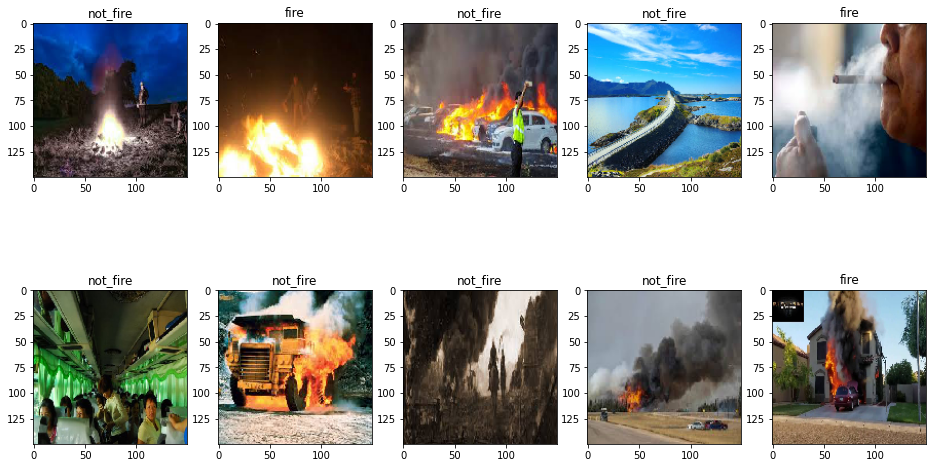

In [143]:
fig = plt.figure(figsize=(16, 9))
for i in range(10):
  ax = fig.add_subplot(2, 5, i+1)
  ax.imshow(batch_test[i])
  tipo_clase = y_hat[2][i]
  ax.set_title(index_to_classes[tipo_clase])
plt.show()

# Conclusiones.
<div align="center">
    <img src="https://github.com/eotorresmolina/analytics_python/blob/main/images/Pipeline7.png?raw=true"
         width=1000 aling="middle">
</div>